In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('Heart Data Cleaning latest.csv')

In [77]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Logistic Regression CV**

In [78]:
X = df.drop('target',axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [79]:
from sklearn.linear_model import LogisticRegressionCV

In [80]:
model = LogisticRegressionCV()

In [81]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [82]:
model.C_

array([2.7825594])

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.coef_

array([[ 0.09227941, -0.77542035,  0.86691058, -0.36564453, -0.2261593 ,
         0.15384769,  0.07879184,  0.46579066, -0.43310431, -0.42945358,
         0.45058897, -1.18460384, -0.63213268]])

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [86]:
y_pred = model.predict(scaled_X_test)

In [87]:
accuracy_score(y_test,y_pred)

0.8709677419354839

In [88]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 1, 15]], dtype=int64)

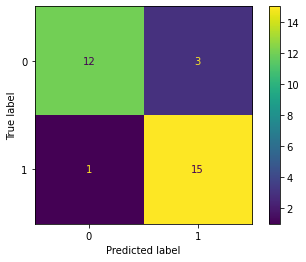

In [89]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



In [91]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

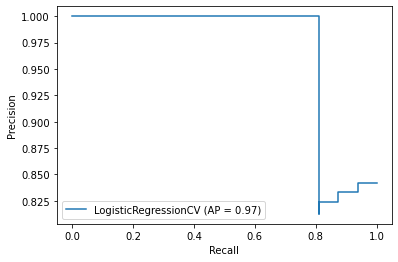

In [92]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

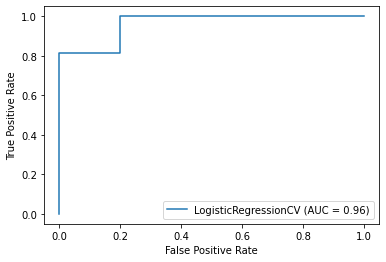

In [93]:
plot_roc_curve(model,scaled_X_test,y_test)

In [108]:
model.coef_

array([[ 0.09227941, -0.77542035,  0.86691058, -0.36564453, -0.2261593 ,
         0.15384769,  0.07879184,  0.46579066, -0.43310431, -0.42945358,
         0.45058897, -1.18460384, -0.63213268]])

**Grid Search**

In [94]:
X = df.drop('target',axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [95]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=500)

In [61]:
np.logspace(0,100,500)

array([1.00000000e+000, 1.58635653e+000, 2.51652705e+000, 3.99210913e+000,
       6.33290840e+000, 1.00462506e+001, 1.59369353e+001, 2.52816614e+001,
       4.01057288e+001, 6.36219849e+001, 1.00927151e+002, 1.60106446e+002,
       2.53985907e+002, 4.02912203e+002, 6.39162405e+002, 1.01393946e+003,
       1.60846948e+003, 2.55160607e+003, 4.04775697e+003, 6.42118571e+003,
       1.01862899e+004, 1.61590875e+004, 2.56340741e+004, 4.06647809e+004,
       6.45088409e+004, 1.02334021e+005, 1.62338243e+005, 2.57526333e+005,
       4.08528580e+005, 6.48071983e+005, 1.02807322e+006, 1.63089068e+006,
       2.58717408e+006, 4.10418050e+006, 6.51069356e+006, 1.03282813e+007,
       1.63843365e+007, 2.59913992e+007, 4.12316259e+007, 6.54080591e+007,
       1.03760502e+008, 1.64601150e+008, 2.61116110e+008, 4.14223247e+008,
       6.57105755e+008, 1.04240401e+009, 1.65362441e+009, 2.62323788e+009,
       4.16139055e+009, 6.60144909e+009, 1.04722519e+010, 1.66127252e+010,
       2.63537052e+010, 4

In [62]:
# Penalty Type
penalty = ['l1', 'l2']
# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0,100,500)

In [63]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [64]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+000, 1.58635653e+000, 2.51652705e+000, 3.99210913e+000,
       6.33290840e+000, 1.00462506e+001, 1.59369353e+001, 2.52816614e+001,
       4.01057288e+001, 6.36219849e+001, 1.00927151e+002, 1.60106446e+002,
       2.53985907e+002, 4.02912203e+002, 6.39162405e+002...
       2.45913043e+095, 3.90105762e+095, 6.18846824e+095, 9.81711702e+095,
       1.55734477e+096, 2.47050406e+096, 3.91910025e+096, 6.21709029e+096,
       9.86252179e+096, 1.56454759e+097, 2.48193029e+097, 3.93722633e+097,
       6.24584471e+097, 9.90813657e+097, 1.57178372e+098, 2.49340937e+098,
       3.95543624e+098, 6.27473213e+098, 9.95396231e+098, 1.57905331e+099,
       2.50494154e+099, 3.97373038e+099, 6.30375315e+099, 1.00000000e+100]),
                         'penalty': ['l1', 'l2']})

In [65]:
grid_model.best_params_

{'C': 3.9921091297480524, 'penalty': 'l1'}

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [67]:
y_pred = grid_model.predict(scaled_X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.8709677419354839

In [69]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 1, 15]], dtype=int64)

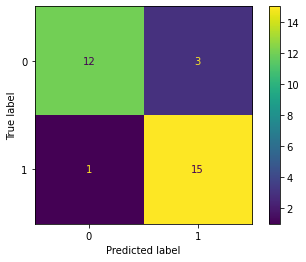

In [70]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



In [72]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

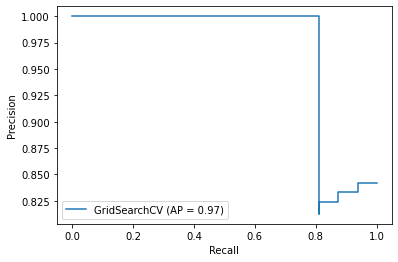

In [73]:
plot_precision_recall_curve(grid_model,scaled_X_test,y_test)

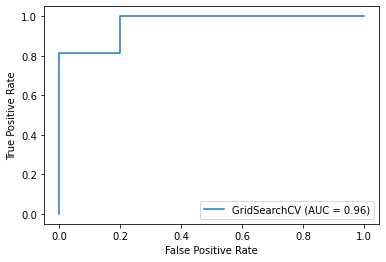

In [74]:
plot_roc_curve(grid_model,scaled_X_test,y_test)